In [2]:
# btag = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root")
# bias = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root")
# btag_pt = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root")

bias_12_4 = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root")
btag_pt_12_4 = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root")

# bias_12_4_cuts = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias_w_cuts/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root")
# btag_pt_12_4_cuts = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt_w_cuts/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root")

# btag.nevents, bias.nevents, btag_pt.nevents

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root
/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root


In [174]:
bias_12_4.sample

'$M_X=$ 1200 GeV, $M_Y=$ 300 GeV'

In [148]:
btag.n_jet, bias.n_jet, btag_pt.n_jet

(<Array [6, 7, 7, 8, 7, 7, ... 8, 7, 9, 7, 9, 8] type='55439 * int32'>,
 <Array [6, 7, 8, 7, 6, 7, ... 7, 8, 9, 7, 9, 8] type='40300 * int32'>,
 <Array [6, 7, 8, 7, 7, 6, ... 7, 8, 9, 7, 9, 8] type='47014 * int32'>)

In [126]:
tight_1_cut_mask = btag.jet_btag[:,0] > jet_btagWP[3]
tight_2_cut_mask = btag.jet_btag[:,1] > jet_btagWP[3]
tight_3_cut_mask = btag.jet_btag[:,2] > jet_btagWP[3]
medium_3_cut_mask = btag.jet_btag[:,2] > jet_btagWP[2]
medium_4_cut_mask = btag.jet_btag[:,3] > jet_btagWP[2]

In [127]:
tight_1_cut = round(ak.sum(btag.jet_btag[:,0] > jet_btagWP[3]) / btag.nevents * 100, 1)
tight_2_cut = round(ak.sum(btag.jet_btag[:,1] > jet_btagWP[3]) / btag.nevents * 100, 1)
tight_3_cut = round(ak.sum(btag.jet_btag[:,2] > jet_btagWP[3]) / btag.nevents * 100, 1)
medium_3_cut = round(ak.sum(btag.jet_btag[:,2] > jet_btagWP[2]) / btag.nevents * 100, 1)
medium_4_cut = round(ak.sum(btag.jet_btag[:,3] > jet_btagWP[2]) / btag.nevents * 100, 1)

In [128]:
tttm_mask = tight_1_cut_mask & tight_2_cut_mask & tight_3_cut_mask & medium_4_cut_mask
ttmm_mask = tight_1_cut_mask & tight_2_cut_mask & medium_3_cut_mask & medium_4_cut_mask

In [4]:
btag_nb_presel = ak.sum(btag.jet_signalId > -1, axis=1)
bias_nb_presel = ak.sum(bias.jet_signalId > -1, axis=1)
btag_pt_nb_presel = ak.sum(btag_pt.jet_signalId > -1, axis=1)
btag_nb_presel, bias_nb_presel

(<Array [6, 4, 5, 6, 6, 6, ... 6, 6, 6, 5, 5, 5] type='55439 * int64'>,
 <Array [6, 5, 6, 6, 5, 6, ... 4, 6, 6, 5, 5, 5] type='40300 * int64'>)

In [48]:
btag_nb_presel == 6

<Array [True, False, False, ... False, False] type='55439 * bool'>

In [4]:
# btag_nh_presel = ak.sum(btag.jet_signalId > -1, axis=1)
# bias_nh_presel = ak.sum(bias.jet_signalId > -1, axis=1)
# btag_nh_presel, bias_nb_presel

# btag_nh_found = \
#     ak.where(ak.sum(btag.jet_signalId == 0, axis=1) + ak.sum(btag.jet_signalId == 1, axis=1) == 2, 1, 0) + \
#     ak.where(ak.sum(btag.jet_signalId == 2, axis=1) + ak.sum(btag.jet_signalId == 3, axis=1) == 2, 1, 0) + \
#     ak.where(ak.sum(btag.jet_signalId == 4, axis=1) + ak.sum(btag.jet_signalId == 5, axis=1) == 2, 1, 0)

# bias_nh_found = \
#     ak.where(ak.sum(bias.jet_signalId == 0, axis=1) + ak.sum(bias.jet_signalId == 1, axis=1) == 2, 1, 0) + \
#     ak.where(ak.sum(bias.jet_signalId == 2, axis=1) + ak.sum(bias.jet_signalId == 3, axis=1) == 2, 1, 0) + \
#     ak.where(ak.sum(bias.jet_signalId == 4, axis=1) + ak.sum(bias.jet_signalId == 5, axis=1) == 2, 1, 0)

bias_12_4_nh_found = \
    ak.where(ak.sum(bias_12_4.jet_signalId == 0, axis=1) + ak.sum(bias_12_4.jet_signalId == 1, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(bias_12_4.jet_signalId == 2, axis=1) + ak.sum(bias_12_4.jet_signalId == 3, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(bias_12_4.jet_signalId == 4, axis=1) + ak.sum(bias_12_4.jet_signalId == 5, axis=1) == 2, 1, 0)

btag_pt_12_4_nh_found = \
    ak.where(ak.sum(btag_pt_12_4.jet_signalId == 0, axis=1) + ak.sum(btag_pt_12_4.jet_signalId == 1, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(btag_pt_12_4.jet_signalId == 2, axis=1) + ak.sum(btag_pt_12_4.jet_signalId == 3, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(btag_pt_12_4.jet_signalId == 4, axis=1) + ak.sum(btag_pt_12_4.jet_signalId == 5, axis=1) == 2, 1, 0)

# btag_nh_found, bias_nh_found

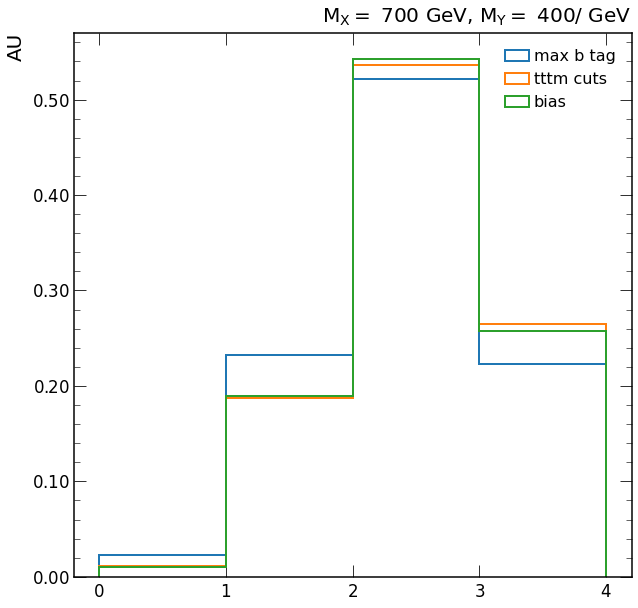

In [135]:
fig, ax = plt.subplots()

n = btag.hist(btag_nh_found, bins=np.arange(5), ax=ax, density=True, label='max b tag')
n = btag.hist(btag_nh_found[tttm_mask], bins=np.arange(5), ax=ax, density=True, label='tttm cuts')
# n = btag.hist(btag_nh_found[ttmm_mask], bins=np.arange(5), ax=ax, density=True, label='ttmm cuts')
# n = btag.hist(btag_nh_found[ttmm_mask], bins=np.arange(5), ax=ax, density=True)
n = bias.hist(bias_nh_found, bins=np.arange(5), ax=ax, density=True, label='bias')

ax.legend()

In [5]:
# btag_higgs_genflag = np.column_stack((btag.HX_b1_genHflag.to_numpy(), btag.HX_b2_genHflag.to_numpy(), btag.H1_b1_genHflag.to_numpy(), btag.H1_b2_genHflag.to_numpy(), btag.H2_b1_genHflag.to_numpy(), btag.H2_b2_genHflag.to_numpy()))
# btag_higgs_genflag

# bias_higgs_genflag = np.column_stack((bias.HX_b1_genHflag.to_numpy(), bias.HX_b2_genHflag.to_numpy(), bias.H1_b1_genHflag.to_numpy(), bias.H1_b2_genHflag.to_numpy(), bias.H2_b1_genHflag.to_numpy(), bias.H2_b2_genHflag.to_numpy()))
# bias_higgs_genflag

# btag_pt_higgs_genflag = np.column_stack((btag_pt.HX_b1_genHflag.to_numpy(), btag_pt.HX_b2_genHflag.to_numpy(), btag_pt.H1_b1_genHflag.to_numpy(), btag_pt.H1_b2_genHflag.to_numpy(), btag_pt.H2_b1_genHflag.to_numpy(), btag_pt.H2_b2_genHflag.to_numpy()))
# btag_pt_higgs_genflag

bias_12_4_higgs_genflag = np.column_stack((bias_12_4.HX_b1_genHflag.to_numpy(), bias_12_4.HX_b2_genHflag.to_numpy(), bias_12_4.H1_b1_genHflag.to_numpy(), bias_12_4.H1_b2_genHflag.to_numpy(), bias_12_4.H2_b1_genHflag.to_numpy(), bias_12_4.H2_b2_genHflag.to_numpy()))
bias_12_4_higgs_genflag

btag_pt_12_4_higgs_genflag = np.column_stack((btag_pt_12_4.HX_b1_genHflag.to_numpy(), btag_pt_12_4.HX_b2_genHflag.to_numpy(), btag_pt_12_4.H1_b1_genHflag.to_numpy(), btag_pt_12_4.H1_b2_genHflag.to_numpy(), btag_pt_12_4.H2_b1_genHflag.to_numpy(), btag_pt_12_4.H2_b2_genHflag.to_numpy()))
btag_pt_12_4_higgs_genflag

array([[ 0,  0,  1,  1,  2, -1],
       [ 0,  0,  1,  2,  1, -1],
       [ 1,  2,  0, -1,  1, -1],
       ...,
       [ 0,  0,  1,  2,  2, -1],
       [ 0,  0,  1,  1,  2, -1],
       [ 0,  0, -1,  2,  1,  2]], dtype=int32)

In [6]:
# btag_nh_found = ((np.sum(btag_higgs_genflag == 0, axis = 1) == 2)*1 + (np.sum(btag_higgs_genflag == 1, axis = 1) == 2)*1 + (np.sum(btag_higgs_genflag == 2, axis = 1) == 2)*1).flatten()

# bias_nh_found = ((np.sum(bias_higgs_genflag == 0, axis = 1) == 2)*1 + (np.sum(bias_higgs_genflag == 1, axis = 1) == 2)*1 + (np.sum(bias_higgs_genflag == 2, axis = 1) == 2)*1).flatten()

# btag_pt_nh_found = ((np.sum(btag_pt_higgs_genflag == 0, axis = 1) == 2)*1 + (np.sum(btag_pt_higgs_genflag == 1, axis = 1) == 2)*1 + (np.sum(btag_pt_higgs_genflag == 2, axis = 1) == 2)*1).flatten()

bias_12_4_nh_found = ((np.sum(bias_12_4_higgs_genflag == 0, axis = 1) == 2)*1 + (np.sum(bias_12_4_higgs_genflag == 1, axis = 1) == 2)*1 + (np.sum(bias_12_4_higgs_genflag == 2, axis = 1) == 2)*1).flatten()

btag_pt_12_4_nh_found = ((np.sum(btag_pt_12_4_higgs_genflag == 0, axis = 1) == 2)*1 + (np.sum(btag_pt_12_4_higgs_genflag == 1, axis = 1) == 2)*1 + (np.sum(btag_pt_12_4_higgs_genflag == 2, axis = 1) == 2)*1).flatten()

In [8]:
# btag_ncorrect = ((btag.HX_b1_genHflag == 0) & (btag.HX_b2_genHflag == 0))*1 + ((btag.H1_b1_genHflag == 1) & (btag.H1_b2_genHflag == 1))*1 + ((btag.H2_b1_genHflag == 2) & (btag.H2_b2_genHflag == 2))*1
# btag_ncorrect

# bias_ncorrect = ((bias.HX_b1_genHflag == 0) & (bias.HX_b2_genHflag == 0))*1 + ((bias.H1_b1_genHflag == 1) & (bias.H1_b2_genHflag == 1))*1 + ((bias.H2_b1_genHflag == 2) & (bias.H2_b2_genHflag == 2))*1
# bias_ncorrect, btag_ncorrect

# btag_pt_ncorrect = ((btag_pt.HX_b1_genHflag == 0) & (btag_pt.HX_b2_genHflag == 0))*1 + ((btag_pt.H1_b1_genHflag == 1) & (btag_pt.H1_b2_genHflag == 1))*1 + ((btag_pt.H2_b1_genHflag == 2) & (btag_pt.H2_b2_genHflag == 2))*1
# bias_ncorrect, btag_ncorrect

bias_12_4_ncorrect = ((bias_12_4.HX_b1_genHflag == 0) & (bias_12_4.HX_b2_genHflag == 0))*1 + ((bias_12_4.H1_b1_genHflag == 1) & (bias_12_4.H1_b2_genHflag == 1))*1 + ((bias_12_4.H2_b1_genHflag == 2) & (bias_12_4.H2_b2_genHflag == 2))*1

btag_pt_12_4_ncorrect = ((btag_pt_12_4.HX_b1_genHflag == 0) & (btag_pt_12_4.HX_b2_genHflag == 0))*1 + ((btag_pt_12_4.H1_b1_genHflag == 1) & (btag_pt_12_4.H1_b2_genHflag == 1))*1 + ((btag_pt_12_4.H2_b1_genHflag == 2) & (btag_pt_12_4.H2_b2_genHflag == 2))*1

In [22]:
from matplotlib.patches import Rectangle

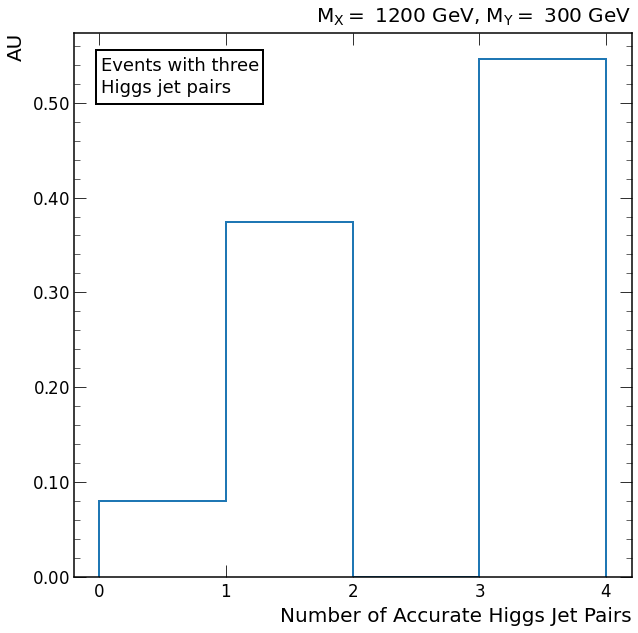

In [47]:
# fig, ax = plt.subplots()

# # n = btag.hist(btag_ncorrect, bins=np.arange(5), ax=ax, density=True)
# # n = bias.hist(bias_ncorrect, bins=np.arange(5), ax=ax, density=True)
# # n = bias_12_4.hist(bias_12_4_ncorrect, bins=np.arange(5), ax=ax, density=True)
# # n = bias_12_4.hist(bias_12_4_ncorrect, bins=np.arange(5), ax=ax, density=True)
# n = bias_12_4.hist(btag_pt_12_4_ncorrect, bins=np.arange(5), ax=ax, density=True)
# # n = bias_12_4.hist(btag_pt_ncorrect, bins=np.arange(5), ax=ax, density=True)
# # n = btag.hist(btag_ncorrect[ttmm_mask], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')
# ax.set_xlabel("Number of Higgs Correctly Paired")

# fig.savefig("plots/3_evt_selections/bias/nhiggs_1d_1200_400.pdf")

fig, ax = plt.subplots()

# n = btag.hist(btag_ncorrect[btag_nb_presel == 6], bins=np.arange(5), ax=ax, density=True)
# n = bias_12_4.hist(bias_ncorrect[bias_nh_found == 3], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')
# n = bias_12_4.hist(bias_12_4_ncorrect[bias_12_4_nh_found == 3], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')
n = bias_12_4.hist(btag_pt_12_4_ncorrect[btag_pt_12_4_nh_found == 3], bins=np.arange(5), ax=ax, density=True)
# n = btag.hist(btag_ncorrect[(btag_nh_found == 3) & ttmm_mask], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')
# n = bias.hist(btag_pt_ncorrect[btag_pt_nh_found == 3], bins=np.arange(5), ax=ax, density=True)

ax.text(0.05, 0.93, 'Events with three', transform=ax.transAxes, fontsize=18)
ax.text(0.05, 0.89, 'Higgs jet pairs', transform=ax.transAxes, fontsize=18)
box = Rectangle((0.04,0.87),0.3,0.1,transform=ax.transAxes, fill=False, color='k', lw=2)
ax.add_artist(box)

ax.set_xlabel("Number of Accurate Higgs Jet Pairs")
# ax.legend(loc=2)

fig.savefig("plots/3_evt_selections/btag_pt/nhiggs_3h_1d_1200_300.pdf")

# fig, ax = plt.subplots()

# # n = btag.hist(btag_ncorrect[btag_nb_presel == 6], bins=np.arange(5), ax=ax, density=True)
# n = bias.hist(bias_ncorrect[bias_nh_found == 2], bins=np.arange(5), ax=ax, density=True, label='Two Higgs Found')

# ax.set_xlabel("Number of Higgs Correctly Paired")
# ax.legend()

# fig.savefig("plots/3_evt_selections/bias/nhiggs_2h_1d.pdf")

# fig, ax = plt.subplots()

# # n = btag.hist(btag_ncorrect[btag_nb_presel == 6], bins=np.arange(5), ax=ax, density=True)
# n = bias.hist(bias_ncorrect[bias_nh_found == 1], bins=np.arange(5), ax=ax, density=True, label='One Higgs Found')

# ax.set_xlabel("Number of Higgs Correctly Paired")
# ax.legend()

# fig.savefig("plots/3_evt_selections/bias/nhiggs_1h_1d.pdf")

In [171]:
bias.sample

'$M_X=$ 700 GeV, $M_Y=$ 400/ GeV'

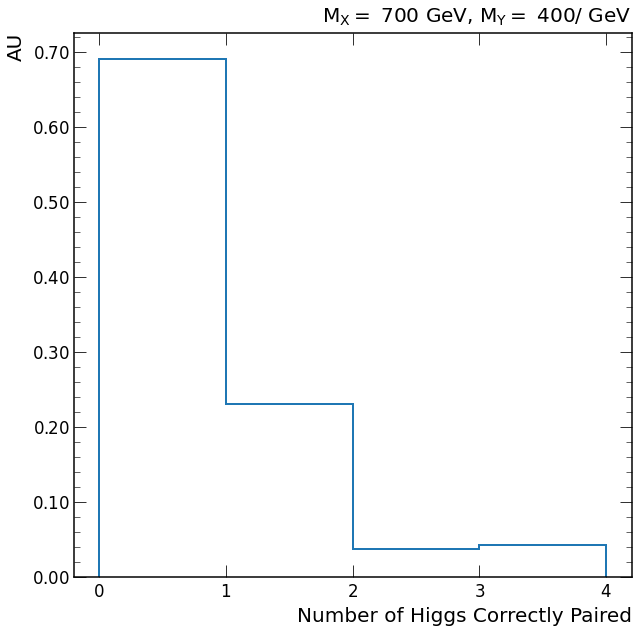

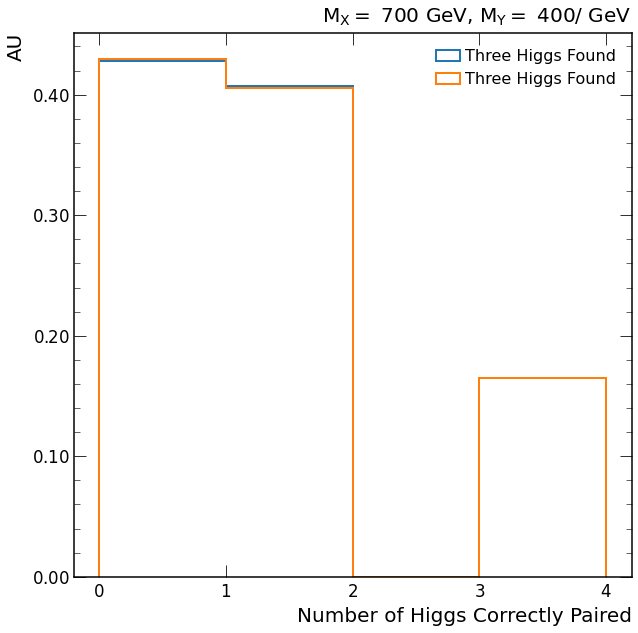

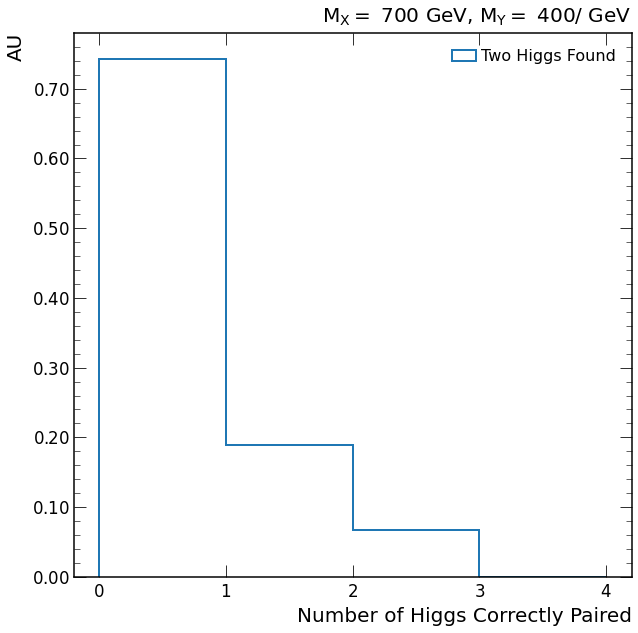

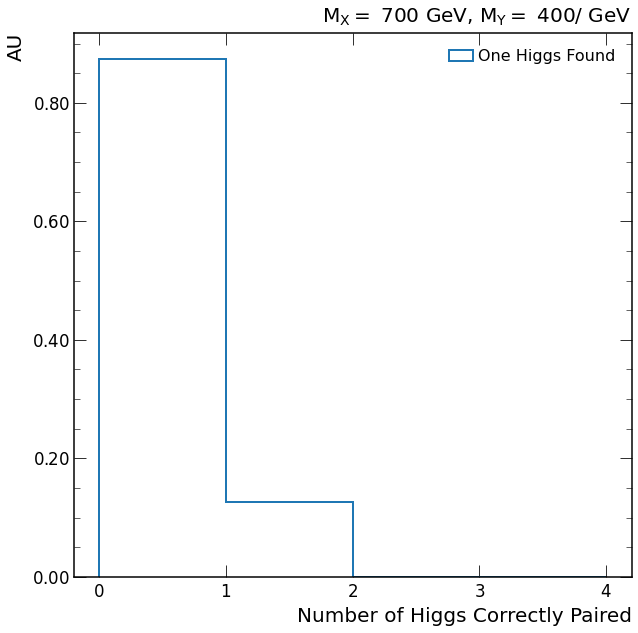

In [143]:
fig, ax = plt.subplots()

# n = btag.hist(btag_ncorrect, bins=np.arange(5), ax=ax, density=True)
# n = btag.hist(btag_ncorrect, bins=np.arange(5), ax=ax, density=True)
# n = btag.hist(btag_ncorrect[tttm_mask], bins=np.arange(5), ax=ax, density=True)
n = btag.hist(btag_ncorrect[ttmm_mask], bins=np.arange(5), ax=ax, density=True)
ax.set_xlabel("Number of Higgs Correctly Paired")

fig, ax = plt.subplots()

# n = btag.hist(btag_ncorrect[btag_nb_presel == 6], bins=np.arange(5), ax=ax, density=True)
# n = btag.hist(btag_ncorrect[(btag_nh_found == 3)], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')
n = btag.hist(btag_ncorrect[(btag_nh_found == 3) & tttm_mask], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')
n = btag.hist(btag_ncorrect[(btag_nh_found == 3) & ttmm_mask], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')

ax.set_xlabel("Number of Higgs Correctly Paired")
ax.legend()

fig.savefig("plots/3_evt_selections/btag/nhiggs_3h_1d.pdf")

fig, ax = plt.subplots()

# n = btag.hist(btag_ncorrect[btag_nb_presel == 6], bins=np.arange(5), ax=ax, density=True)
n = btag.hist(btag_ncorrect[(btag_nh_found == 2) & ttmm_mask], bins=np.arange(5), ax=ax, density=True, label='Two Higgs Found')

ax.set_xlabel("Number of Higgs Correctly Paired")
ax.legend()

fig.savefig("plots/3_evt_selections/btag/nhiggs_2h_1d.pdf")

fig, ax = plt.subplots()

# n = btag.hist(btag_ncorrect[btag_nb_presel == 6], bins=np.arange(5), ax=ax, density=True)
n = btag.hist(btag_ncorrect[btag_nh_found == 1], bins=np.arange(5), ax=ax, density=True, label='One Higgs Found')

ax.set_xlabel("Number of Higgs Correctly Paired")
ax.legend()

fig.savefig("plots/3_evt_selections/btag/nhiggs_1h_1d.pdf")

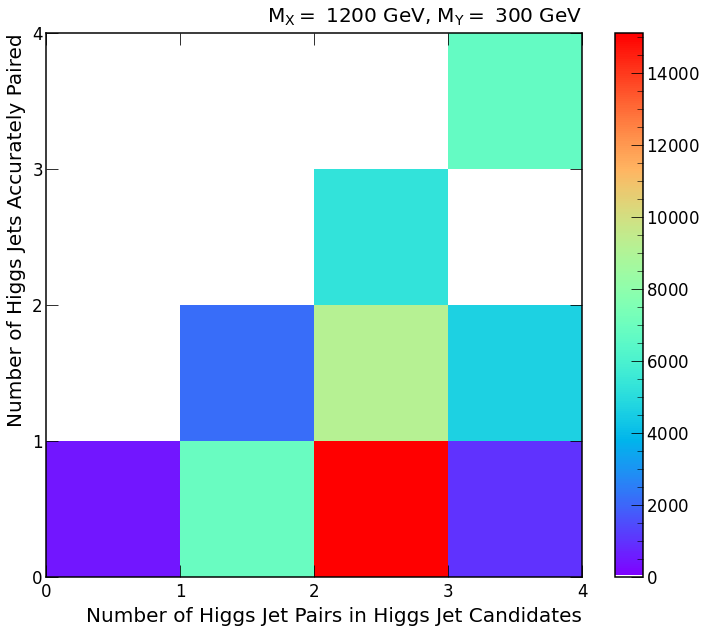

In [48]:
fig, ax = plt.subplots(figsize=(12,10))

n, xe, xy, im = Hist2d(btag_pt_12_4_nh_found, btag_pt_12_4_ncorrect, bins=np.arange(5), ax=ax)

ax.minorticks_off()

ax.set_xticks(np.arange(5), np.arange(5))
ax.set_yticks(np.arange(5), np.arange(5))

ax.set_xlabel("Number of Higgs Jet Pairs in Higgs Jet Candidates")
ax.set_ylabel("Number of Higgs Jets Accurately Paired")

# ax.set_ylabel("Number of Higgs Jets Accurately Paired into Higgs Boson Candidates")

ax.set_title(bias_12_4.sample)

fig.colorbar(im, ax=ax)

fig.savefig("plots/3_evt_selections/btag_pt/nhiggs_2d_1200_300.pdf")

Text(1, 0, 'Number of Correctly Paired Higgs')

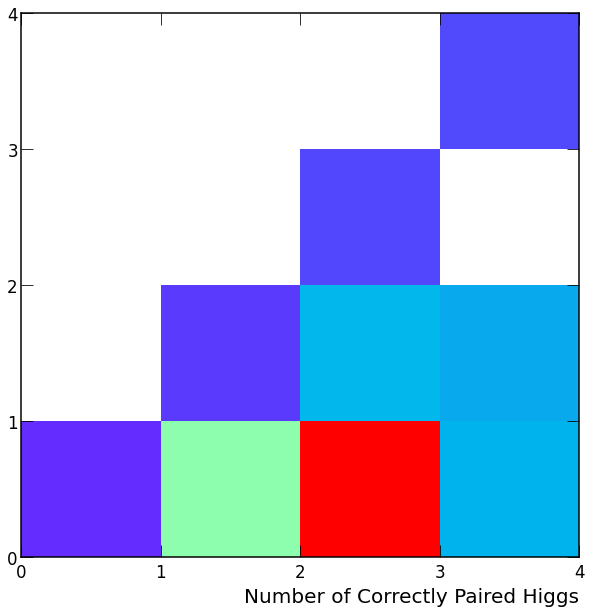

In [105]:
fig, ax = plt.subplots()

n, xe, xy, im = Hist2d(btag_nh_found, btag_ncorrect, bins=np.arange(5), ax=ax)

ax.minorticks_off()

ax.set_xticks(np.arange(5), np.arange(5))
ax.set_yticks(np.arange(5), np.arange(5))

ax.set_xlabel("Number of Possible Higgs to Pair")
ax.set_xlabel("Number of Correctly Paired Higgs")

In [ ]:
btag_ncorrect = ((btag.HX_b1_genHflag == 0) & (btag.HX_b2_genHflag == 0))*1 + ((btag.H1_b1_genHflag == 1) & (btag.H1_b2_genHflag == 1))*1 + ((btag.H2_b1_genHflag == 2) & (btag.H2_b2_genHflag == 2))*1
btag_ncorrect

bias_ncorrect = ((bias.HX_b1_genHflag == 0) & (bias.HX_b2_genHflag == 0))*1 + ((bias.H1_b1_genHflag == 1) & (bias.H1_b2_genHflag == 1))*1 + ((bias.H2_b1_genHflag == 2) & (bias.H2_b2_genHflag == 2))*1
bias_ncorrect, btag_ncorrect

In [6]:
assert ak.all(ak.argmax(btag.jet_btag, axis=1) == 0)

In [17]:
tight_1_cut_mask = btag.jet_btag[:,0] > jet_btagWP[3]
tight_2_cut_mask = btag.jet_btag[:,1] > jet_btagWP[3]
tight_3_cut_mask = btag.jet_btag[:,2] > jet_btagWP[3]
medium_3_cut_mask = btag.jet_btag[:,2] > jet_btagWP[2]
medium_4_cut_mask = btag.jet_btag[:,3] > jet_btagWP[2]

In [18]:
tight_1_cut = round(ak.sum(btag.jet_btag[:,0] > jet_btagWP[3]) / btag.nevents * 100, 1)
tight_2_cut = round(ak.sum(btag.jet_btag[:,1] > jet_btagWP[3]) / btag.nevents * 100, 1)
tight_3_cut = round(ak.sum(btag.jet_btag[:,2] > jet_btagWP[3]) / btag.nevents * 100, 1)
medium_3_cut = round(ak.sum(btag.jet_btag[:,2] > jet_btagWP[2]) / btag.nevents * 100, 1)
medium_4_cut = round(ak.sum(btag.jet_btag[:,3] > jet_btagWP[2]) / btag.nevents * 100, 1)

In [19]:
tttm_mask = tight_1_cut_mask & tight_2_cut_mask & tight_3_cut_mask & medium_4_cut_mask
ttmm_mask = tight_1_cut_mask & tight_2_cut_mask & medium_3_cut_mask & medium_4_cut_mask

In [21]:
ak.sum(tttm_mask) / btag.nevents, ak.sum(ttmm_mask) / btag.nevents

(0.7613954075650715, 0.8284961849961219)

In [25]:
round(ak.sum(tight_1_cut_mask)/btag.nevents*100,1), round((ak.sum(tight_1_cut_mask & tight_2_cut_mask))/btag.nevents*100,1), round((ak.sum(tight_1_cut_mask & tight_2_cut_mask & tight_3_cut_mask))/btag.nevents*100,1), round((ak.sum(tight_1_cut_mask & tight_2_cut_mask & tight_3_cut_mask & medium_4_cut_mask))/btag.nevents*100,1)

(99.7, 96.9, 83.6, 76.1)

In [26]:
round(ak.sum(tight_1_cut_mask)/btag.nevents*100,1), round((ak.sum(tight_1_cut_mask & tight_2_cut_mask))/btag.nevents*100,1), round((ak.sum(tight_1_cut_mask & tight_2_cut_mask & medium_3_cut_mask))/btag.nevents*100,1), round((ak.sum(tight_1_cut_mask & tight_2_cut_mask & medium_3_cut_mask & medium_4_cut_mask))/btag.nevents*100,1)

(99.7, 96.9, 95.3, 82.8)